In [44]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt

In [31]:
co_offending_table = pd.read_csv('./Cooffending.csv')
co_offending_table.drop_duplicates(inplace=True)
co_offending_table.sort_values(by='NoUnique', inplace=True)
def to_int(x):
    if x == ' ':
        return 0
    else:
        return int(x)
co_offending_table.NCD1 = co_offending_table.NCD1.apply(to_int)
co_offending_table.NCD1 = co_offending_table.NCD1.astype(int)
co_offending_table['ArrestCount'] = co_offending_table.groupby('NoUnique')['SeqE'].transform('count')

In [32]:
# build mapping of crimes and offender to indicies of a matrix 

offenders = np.unique(co_offending_table[co_offending_table.ArrestCount > 1]['NoUnique'])
crime_types = np.unique(co_offending_table.NCD1)
number_of_offenders = len(offenders)
number_of_crime_types = len(crime_types)

crime_to_index = {}
offender_to_index = {}

for (offender, index) in zip(offenders,range(number_of_offenders)):
    offender_to_index[offender] = index
    
for (crime, index) in zip(crime_types,range(number_of_crime_types)):
    crime_to_index[crime] = index

In [33]:
X = np.zeros((number_of_crime_types,number_of_offenders))

In [35]:
for column_index in range(number_of_offenders):
    if column_index % 100000 == 0:
        print(column_index)
    offender = offenders[column_index]
    crimes = co_offending_table[co_offending_table.NoUnique == offender]['NCD1'].values
    for crime in crimes:
        crime_index = crime_to_index[crime]
        X[crime_index, column_index] = 1

0
100000


In [38]:
from sklearn.manifold import TSNE

In [52]:
embedding = TSNE()
X_embedded = embedding.fit_transform(X)

In [53]:
X_embedded.shape

(295, 2)

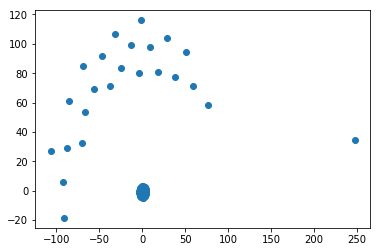

In [54]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

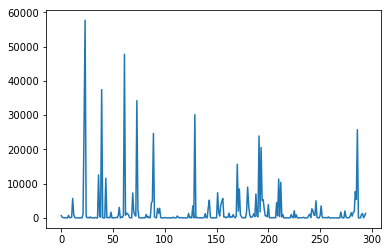

In [60]:
plt.plot(np.matmul(X, np.ones(X.shape[1])))
plt.show()